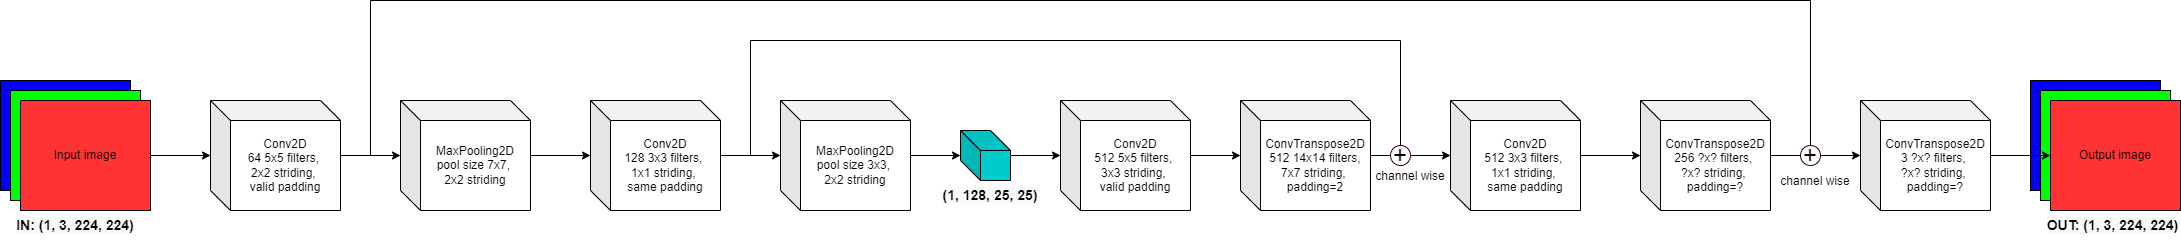

In [ ]:
import torch
from torch import nn
from torchvision import models
from torchsummary import summary

In [ ]:
class Reconstruct(nn.Module):
    def __init__(self):
        super(Reconstruct, self).__init__()

        # DEFINE the layers

        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = (5, 5), stride = (2, 2), padding = "valid")

        self.maxPool1 = nn.MaxPool2d(kernel_size = (7, 7), stride = (2, 2))

        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), stride = (1, 1), padding = "same")

        self.maxPool2 = nn.MaxPool2d(kernel_size = (3, 3), stride = (2, 2))

        self.conv3 = nn.Conv2d(in_channels = 128, out_channels = 512, kernel_size = (5, 5), stride = (3, 3), padding = "valid")

        self.convTrans1 = nn.ConvTranspose2d(in_channels = 512, out_channels = 512, kernel_size = (14, 14), stride = (7, 7), padding = 2)

        self.conv4 = nn.Conv2d(in_channels = 640, out_channels = 512, kernel_size = (3, 3), stride = (1, 1), padding = "same")

        self.convTrans2 = nn.ConvTranspose2d(in_channels = 512, out_channels = 256, kernel_size = (8, 8), stride = (2, 2), padding = 0)

        self.convTrans3 = nn.ConvTranspose2d(in_channels = 320, out_channels = 3, kernel_size = (6, 6), stride = (2, 2), padding = 0)

    def forward(self, images):

        conv1_out = self.conv1(images)
        print("conv1: " , conv1_out.shape)

        maxPooling1_out = self.maxPool1(conv1_out)
        print("maxPool1: ", maxPooling1_out.shape)

        conv2_out = self.conv2(maxPooling1_out)
        print("conv2: " , conv2_out.shape)

        ###

        maxPool2_out = self.maxPool2(conv2_out)
        print("maxPool2: ", maxPool2_out.shape)

        maxPool2_out = maxPool2_out.view(1, 128, 25, 25)
        print("reshape: ", maxPool2_out.shape)

        conv3_out = self.conv3(maxPool2_out)
        print("conv3: ", conv3_out.shape)

        convTrans1_out = self.convTrans1(conv3_out)
        print("convTrans1_out: ", convTrans1_out.shape)

        ###

        combined1 = torch.cat((conv2_out, convTrans1_out), dim = 1)
        print("combined1", combined1.shape)

        conv4_out = self.conv4(combined1)
        print("conv4_out", conv4_out.shape)

        convTrans2_out = self.convTrans2(conv4_out)
        print("convTrans2_out", convTrans2_out.shape)

        ###

        combined2 = torch.cat((conv1_out, convTrans2_out), dim = 1)
        print("combined2", combined2.shape)

        convTrans3_out = self.convTrans3(combined2)
        print("convTrans3_out", convTrans3_out.shape)

        return convTrans3_out #replace by actual output

torch.Size( [1, 3, 224, 224] )

In [ ]:
input_image = torch.randn(1,3,224,224)

custom = Reconstruct()
output = custom(input_image)

#print("Your output shape is ", output.shape)



conv1:  torch.Size([1, 64, 110, 110])
maxPool1:  torch.Size([1, 64, 52, 52])
conv2:  torch.Size([1, 128, 52, 52])
maxPool2:  torch.Size([1, 128, 25, 25])
reshape:  torch.Size([1, 128, 25, 25])
conv3:  torch.Size([1, 512, 7, 7])
convTrans1_out:  torch.Size([1, 512, 52, 52])
combined1 torch.Size([1, 640, 52, 52])
conv4_out torch.Size([1, 512, 52, 52])
convTrans2_out torch.Size([1, 256, 110, 110])
combined2 torch.Size([1, 320, 110, 110])
convTrans3_out torch.Size([1, 3, 224, 224])
